In [32]:
import numpy as np

# reading in all data into a NumPy array
all_data = np.loadtxt(open("./wine_data1.csv","r"),
        delimiter=",",
        skiprows=1,
        dtype=np.float64
        )

# load class labels from column 14
y_wine = all_data[:,0]

# conversion of the class labels to integer-type array
y_wine = y_wine.astype(np.int64, copy=False)

# load the 13 features
X_wine = all_data[:,1:]

# printing some general information about the data
print('\ntotal number of samples (rows):', X_wine.shape[0])
print('total number of features (columns):', X_wine.shape[1])

# printing the 1st wine sample
float_formatter = lambda x: '{:.2f}'.format(x)
np.set_printoptions(formatter={'float_kind':float_formatter})
print('\n1st sample (i.e., 1st row):\nClass label: {:d}\n{:}\n'
          .format(int(y_wine[0]), X_wine[0]))

# printing the rel.frequency of the class labels
print('Class label frequencies')
print('Class 1 samples: {:.2%}'.format(list(y_wine).count(1)/y_wine.shape[0]))
print('Class 2 samples: {:.2%}'.format(list(y_wine).count(2)/y_wine.shape[0]))
print('Class 3 samples: {:.2%}'.format(list(y_wine).count(3)/y_wine.shape[0]))


total number of samples (rows): 178
total number of features (columns): 13

1st sample (i.e., 1st row):
Class label: 1
[14.23 1.71 2.43 15.60 127.00 2.80 3.06 0.28 2.29 5.64 1.04 3.92 1065.00]

Class label frequencies
Class 1 samples: 33.15%
Class 2 samples: 39.89%
Class 3 samples: 26.97%


# Plotting Scatter plot

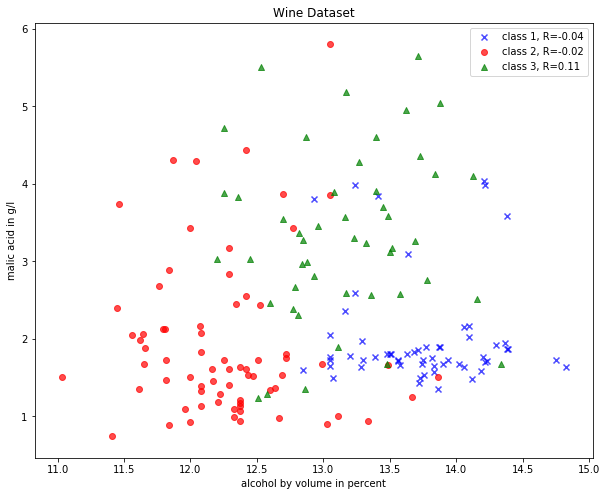

In [33]:
from scipy.stats import pearsonr

plt.figure(figsize=(10,8))

for label,marker,color in zip(
        range(1,4),('x', 'o', '^'),('blue', 'red', 'green')):

    # Calculate Pearson correlation coefficient
    R = pearsonr(X_wine[:,0][y_wine == label], X_wine[:,1][y_wine == label])
    plt.scatter(x=X_wine[:,0][y_wine == label], # x-axis: feat. from col. 1
                y=X_wine[:,1][y_wine == label], # y-axis: feat. from col. 2
                marker=marker, # data point symbol for the scatter plot
                color=color,
                alpha=0.7,
                label='class {:}, R={:.2f}'.format(label, R[0]) # label for the legend
                )

plt.title('Wine Dataset')
plt.xlabel('alcohol by volume in percent')
plt.ylabel('malic acid in g/l')
plt.legend(loc='upper right')

plt.show()

# 3D plot

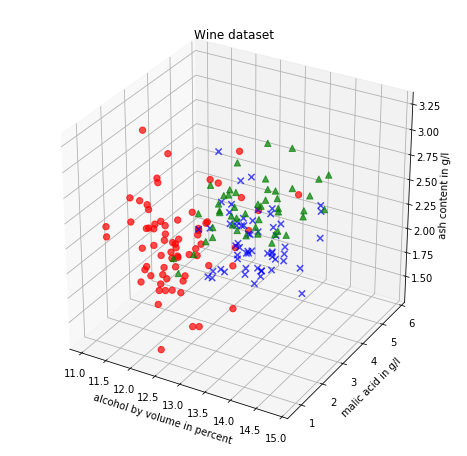

In [34]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')

for label,marker,color in zip(
        range(1,4),('x', 'o', '^'),('blue','red','green')):

    ax.scatter(X_wine[:,0][y_wine == label],
               X_wine[:,1][y_wine == label],
               X_wine[:,2][y_wine == label],  
               marker=marker,
               color=color,
               s=40,
               alpha=0.7,
               label='class {}'.format(label))

ax.set_xlabel('alcohol by volume in percent')
ax.set_ylabel('malic acid in g/l')
ax.set_zlabel('ash content in g/l')

plt.title('Wine dataset')

plt.show()

# Train / Test Split

In [35]:
from sklearn.cross_validation import train_test_split
from sklearn import preprocessing

X_train, X_test, y_train, y_test = train_test_split(X_wine, y_wine,
     test_size=0.30, random_state=500)

In [36]:
print('Class label frequencies')

print('\nTraining Dataset:')    
for l in range(1,4):
    print('Class {:} samples: {:.2%}'.format(l, list(y_train).count(l)/y_train.shape[0]))

print('\nTest Dataset:')     
for l in range(1,4):
    print('Class {:} samples: {:.2%}'.format(l, list(y_test).count(l)/y_test.shape[0]))

Class label frequencies

Training Dataset:
Class 1 samples: 32.26%
Class 2 samples: 41.94%
Class 3 samples: 25.81%

Test Dataset:
Class 1 samples: 35.19%
Class 2 samples: 35.19%
Class 3 samples: 29.63%


# Normalizing the data
# In this approach, the data is scaled to a fixed range - usually 0 to 1. We will end up with small standard deviations, for example in the case where outliers are present.

In [37]:
minmax_scale = preprocessing.MinMaxScaler(feature_range=(0, 1)).fit(X_train)
X_train_minmax = minmax_scale.transform(X_train)
X_test_minmax = minmax_scale.transform(X_test)

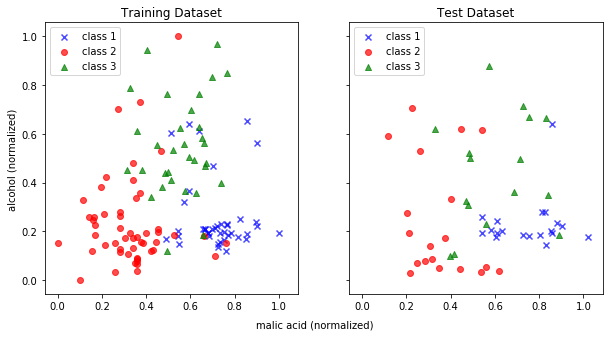

In [38]:
f, ax = plt.subplots(1, 2, sharex=True, sharey=True, figsize=(10,5))

for a,x_dat, y_lab in zip(ax, (X_train_minmax, X_test_minmax), (y_train, y_test)):

    for label,marker,color in zip(
        range(1,4),('x', 'o', '^'),('blue','red','green')):

        a.scatter(x=x_dat[:,0][y_lab == label],
                y=x_dat[:,1][y_lab == label],
                marker=marker,
                color=color,   
                alpha=0.7,   
                label='class {}'.format(label)
                )

    a.legend(loc='upper left')

ax[0].set_title('Training Dataset')
ax[1].set_title('Test Dataset')
f.text(0.5, 0.04, 'malic acid (normalized)', ha='center', va='center')
f.text(0.08, 0.5, 'alcohol (normalized)', ha='center', va='center', rotation='vertical')

plt.show()

# Another important procedure is to standardize the data prior to fitting the model and other analyses so that the features will have the properties of a standard normal distribution with μ=0 and σ=1 where μ is the mean (average) and σ is the standard deviation from the mean.

# Standardizing the features so that they are centered around 0 with a standard deviation of 1 is especially important if we are comparing measurements that have different units, e.g., in our “wine data” example, where the alcohol content is measured in volume percent, and the malic acid content in g/l.

In [41]:
std_scale = preprocessing.StandardScaler().fit(X_train)
X_train = std_scale.transform(X_train)
X_test = std_scale.transform(X_test)

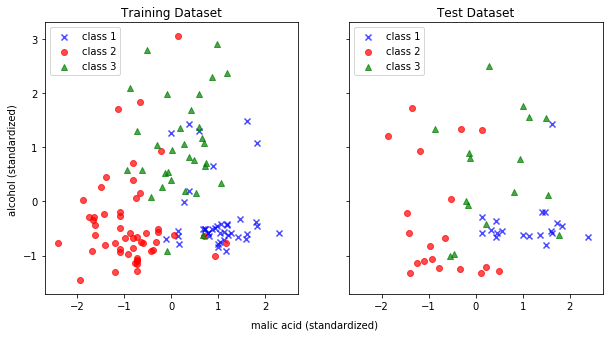

In [42]:
f, ax = plt.subplots(1, 2, sharex=True, sharey=True, figsize=(10,5))

for a,x_dat, y_lab in zip(ax, (X_train, X_test), (y_train, y_test)):

    for label,marker,color in zip(
        range(1,4),('x', 'o', '^'),('blue','red','green')):

        a.scatter(x=x_dat[:,0][y_lab == label],
                y=x_dat[:,1][y_lab == label],
                marker=marker,
                color=color,   
                alpha=0.7,   
                label='class {}'.format(label)
                )

    a.legend(loc='upper left')

ax[0].set_title('Training Dataset')
ax[1].set_title('Test Dataset')
f.text(0.5, 0.04, 'malic acid (standardized)', ha='center', va='center')
f.text(0.08, 0.5, 'alcohol (standardized)', ha='center', va='center', rotation='vertical')

plt.show()

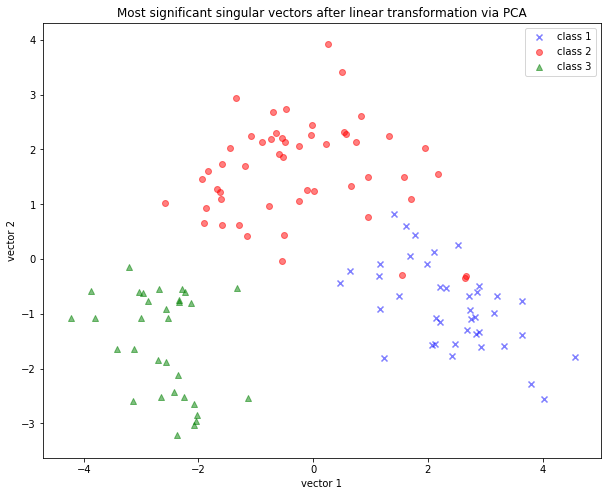

In [43]:
from sklearn.decomposition import PCA
sklearn_pca = PCA(n_components=2) # number of components to keep
sklearn_transf = sklearn_pca.fit_transform(X_train)

plt.figure(figsize=(10,8))

for label,marker,color in zip(
        range(1,4),('x', 'o', '^'),('blue', 'red', 'green')):

    plt.scatter(x=sklearn_transf[:,0][y_train == label],
                y=sklearn_transf[:,1][y_train == label],
                marker=marker,
                color=color,
                alpha=0.5,
                label='class {}'.format(label)
                )

plt.xlabel('vector 1')
plt.ylabel('vector 2')

plt.legend()
plt.title('Most significant singular vectors after linear transformation via PCA')

plt.show()

# If we want to use PCA for feature selection, we probably don’t want to reduce the dimensionality that drastically. 

# By default, the PCA function (PCA(n_components=None)) keeps all the components in ranked order. So we could basically either set the number n_components to a smaller size then the input dataset, or we could extract the top n components later from the returned NumPy array.

# To get an idea about how well each components (relatively) “explains” the variance, we can use explained_variance_ratio_ instant method, which also confirms that the components are ordered from most explanatory to least explanatory (the ratios sum up to 1.0).

In [44]:
sklearn_pca = PCA(n_components=None)
sklearn_transf = sklearn_pca.fit_transform(X_train)
sklearn_pca.explained_variance_ratio_

array([0.36, 0.21, 0.12, 0.06, 0.06, 0.04, 0.04, 0.03, 0.02, 0.02, 0.02,
       0.01, 0.01])